## Problem Statement

**Solomon Akatakpo (PhD.)**

### Context


AllLife Bank has received advice from their marketing research team to improve their market penetration, specifically focusing on their credit card customer base in the upcoming financial year. In light of this, the Marketing team proposes implementing personalized campaigns to target new customers and upsell to existing customers. Additionally, the market research has indicated that customers have a negative perception of the bank's support services. As a result, the Operations team plans to upgrade the service delivery model to ensure faster resolution of customer queries. Recognizing the need for data-driven solutions, both the Head of Marketing and the Head of Delivery have approached the Data Science team for assistance.


### Objective

The objective is to use clustering algorithms to identify distinct segments among the existing customers of AllLife Bank. This segmentation will be based on their spending patterns and past interactions with the bank. By analyzing these segments, the Data Science team aims to provide valuable recommendations to the bank on how to enhance their marketing strategies and improve services tailored to each segment. This data-driven approach will help AllLife Bank better understand its customers, target them effectively, and deliver personalized experiences to meet their specific needs.


###  Data Description

The dataset consists of financial attributes of customers from a bank, including information such as credit limit, the total number of credit cards held by each customer, and details about the different channels through which customers have contacted the bank for queries. These channels may include visiting the bank in person, online interactions, or contacting the bank through a call center. The dataset provides valuable insights into the financial profiles and communication preferences of the bank's customers, which can be analyzed to gain a deeper understanding of customer behavior, preferences, and needs. This information can help the bank make data-driven decisions to improve customer experience, tailor marketing strategies, and optimize service delivery.


**Data Dictionary**

- Sl_No: Primary key of the records
- Customer Key: Customer identification number
- Average Credit Limit: Average credit limit of each customer for all credit cards
- Total credit cards: Total number of credit cards possessed by the customer
- Total visits bank: Total number of Visits that customer made (yearly) personally to the bank
- Total visits online: Total number of visits or online logins made by the customer (yearly)
- Total calls made: Total number of calls made by the customer to the bank or its customer service department (yearly)

## Importing necessary libraries

In [2]:
# this will help in making the Python code more structured automatically (good coding practice)
# %load_ext nb_black

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to suppress warnings
import warnings

warnings.filterwarnings("ignore")

## Loading the dataset

In [3]:
df_cust = pd.read_csv('Credit_Card_Customer_Data.csv')## import the data

## Overview of the Dataset

### Checking the shape of the dataset

In [4]:
print(f"There are {df_cust.shape[0]} rows and {df_cust.shape[1]} columns.") 

There are 660 rows and 7 columns.


### Displaying few rows of the dataset

In [5]:
# viewing the first 5 rows of the data
df_cust.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


### Creating a copy of original data

In [6]:
# copying the data to another variable to avoid any changes to original data
data = df_cust.copy()

In [7]:
# fixing column names
data.columns = [c.replace(" ", "_") for c in data.columns]

### Checking the data types of the columns for the dataset

In [8]:
# checking datatypes and number of non-null values for each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer_Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


- All the columns in the data are numeric.

### Checking the missing values 

In [9]:
# checking for missing values
data.isnull().sum()

Sl_No                  0
Customer_Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

- There are no missing values in the data.

In [10]:
# checking the number of unique values in each column
data.nunique()

Sl_No                  660
Customer_Key           655
Avg_Credit_Limit       110
Total_Credit_Cards      10
Total_visits_bank        6
Total_visits_online     16
Total_calls_made        11
dtype: int64

### Checking for duplicates values

**Let's look at the duplicate values in the *Customer_Key* column closely.**

In [11]:
# getting the count for each unique value in Customer_Key
data_grouped = data.groupby("Customer_Key").count()

for i in data_grouped.loc[data_grouped.Sl_No >= 2].index:
    display(data.loc[data.Customer_Key == i])

,Sl_No,Customer_Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
48,49,37252,6000,4,0,2,8
432,433,37252,59000,6,2,1,2


,Sl_No,Customer_Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
4,5,47437,100000,6,0,12,3
332,333,47437,17000,7,3,1,0


,Sl_No,Customer_Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
411,412,50706,44000,4,5,0,2
541,542,50706,60000,7,5,2,2


,Sl_No,Customer_Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
391,392,96929,13000,4,5,0,0
398,399,96929,67000,6,2,2,2


,Sl_No,Customer_Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
104,105,97935,17000,2,1,2,10
632,633,97935,187000,7,1,7,0


In [12]:
data.drop(columns=["Sl_No"], inplace=True) #  to drop the Sl_No column 
data.drop(columns=["Customer_Key"], inplace=True) #to drop the Customer_Key column

In [13]:
data.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


### Statistical summary of the dataset

In [14]:
# Let's look at the statistical summary of the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.0,18000.0,48000.0,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.0,5.0,6.0,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.0,2.0,4.0,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.0,2.0,4.0,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.0,3.0,5.0,10.0


**Observations**
- The average credit_card_limit for each customer is 34574, while the minimum and maximum credit card limits are 3000 and 200000, respectively.
- The total number of credit cards possessed by the customer has a mean of 4.7 and minimum of 1 and maximum of 10
- The total number of visits made by custoomers annually to the bank has a mean of 2.4. There are customers who did not make any visit to the bank throughout the year, while other customers made as much as 5 visits
- Annual total visits online by customers has an average of 2.6 (slightly higher than physical visits to the bank). The minimum visit is 0 while the maximum online visit per year is 15
- The total number of calls made by the customers to the bank annually has a mean of 3.5, minimum of 0 and a maximum of 10. This shows that on average, customers prefer making calls than physically visiting the bank or visiting online. However the maximum number of online visits is higher than maximum number of total calls made annually.

## Exploratory Data Analysis

#### The below functions need to be defined to carry out the Exploratory Data Analysis.

In [15]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

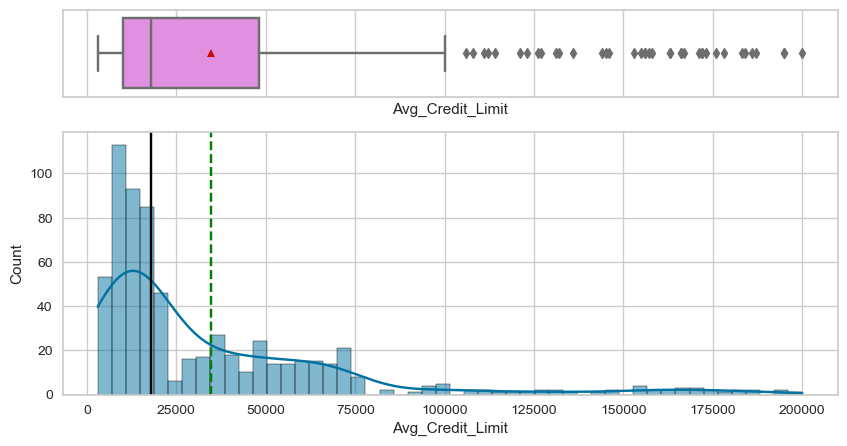

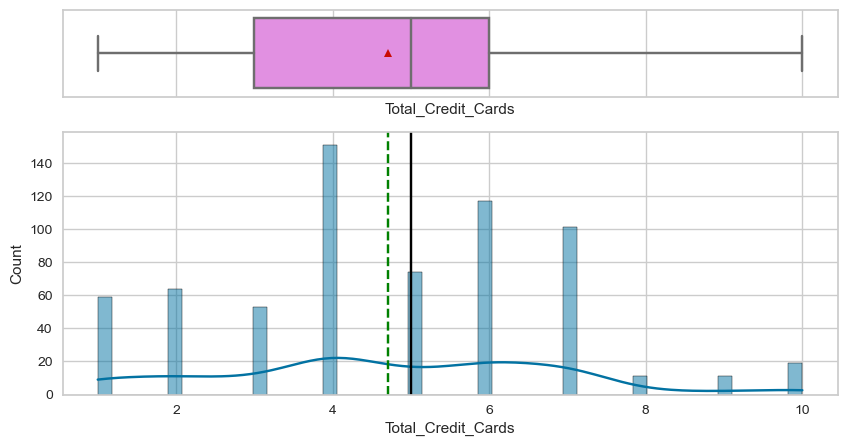

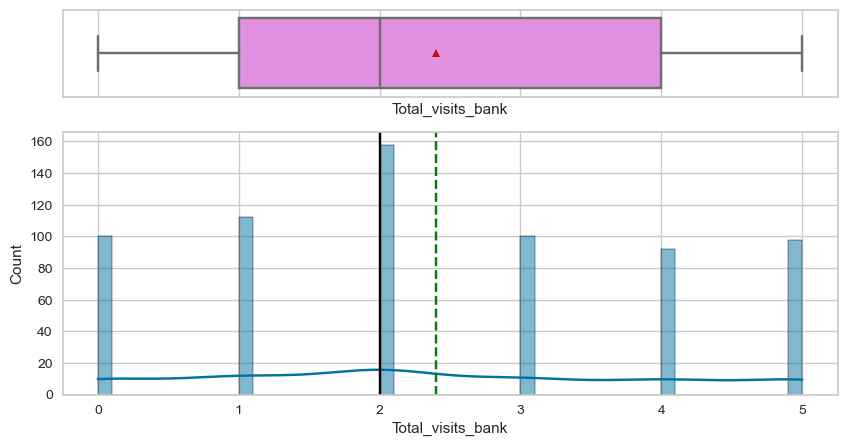

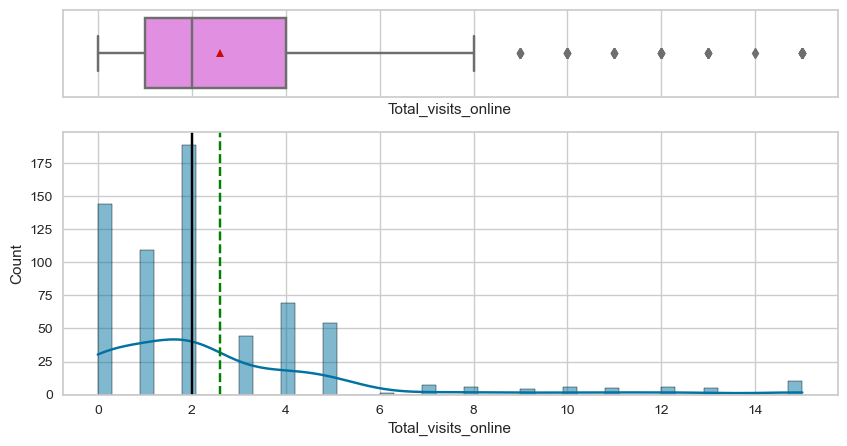

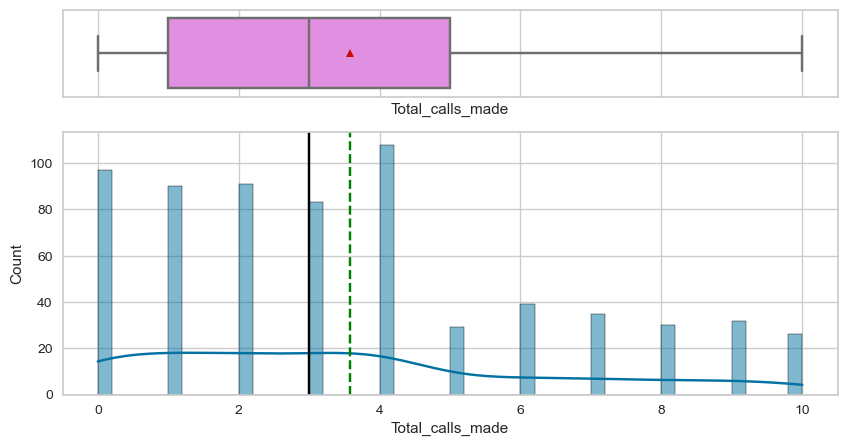

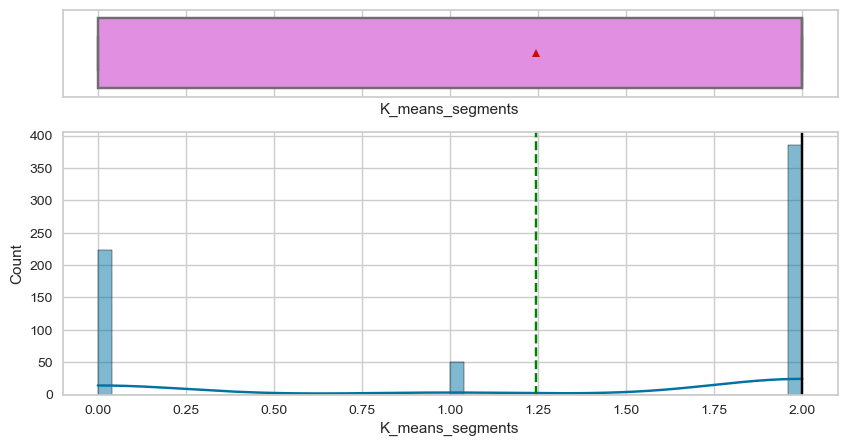

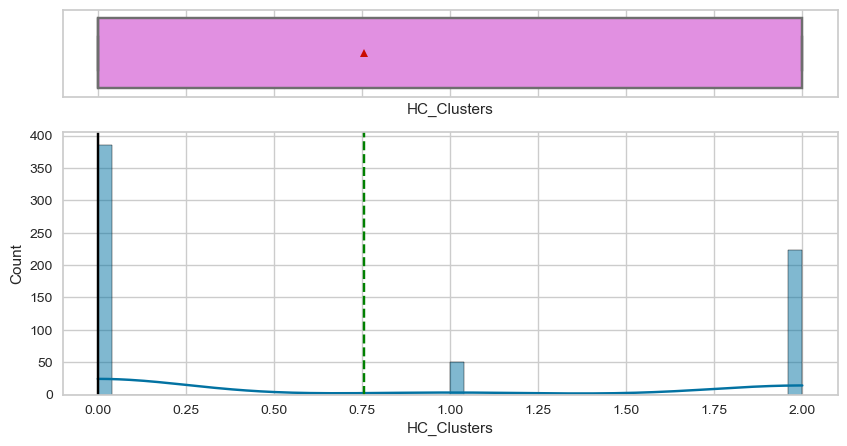

In [174]:
# selecting numerical columns
num_cols = data.select_dtypes(include=np.number).columns.tolist()

for item in num_cols:
    histogram_boxplot(df1, item, bins=50, kde=True, figsize=(10, 5))

In [16]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### Univariate analysis

In [ ]:
for col in df.columns:
    histogram_boxplot(data, col)

In [ ]:
for col in df.columns.tolist()[1:]:
    labeled_barplot(data, col, perc=True)

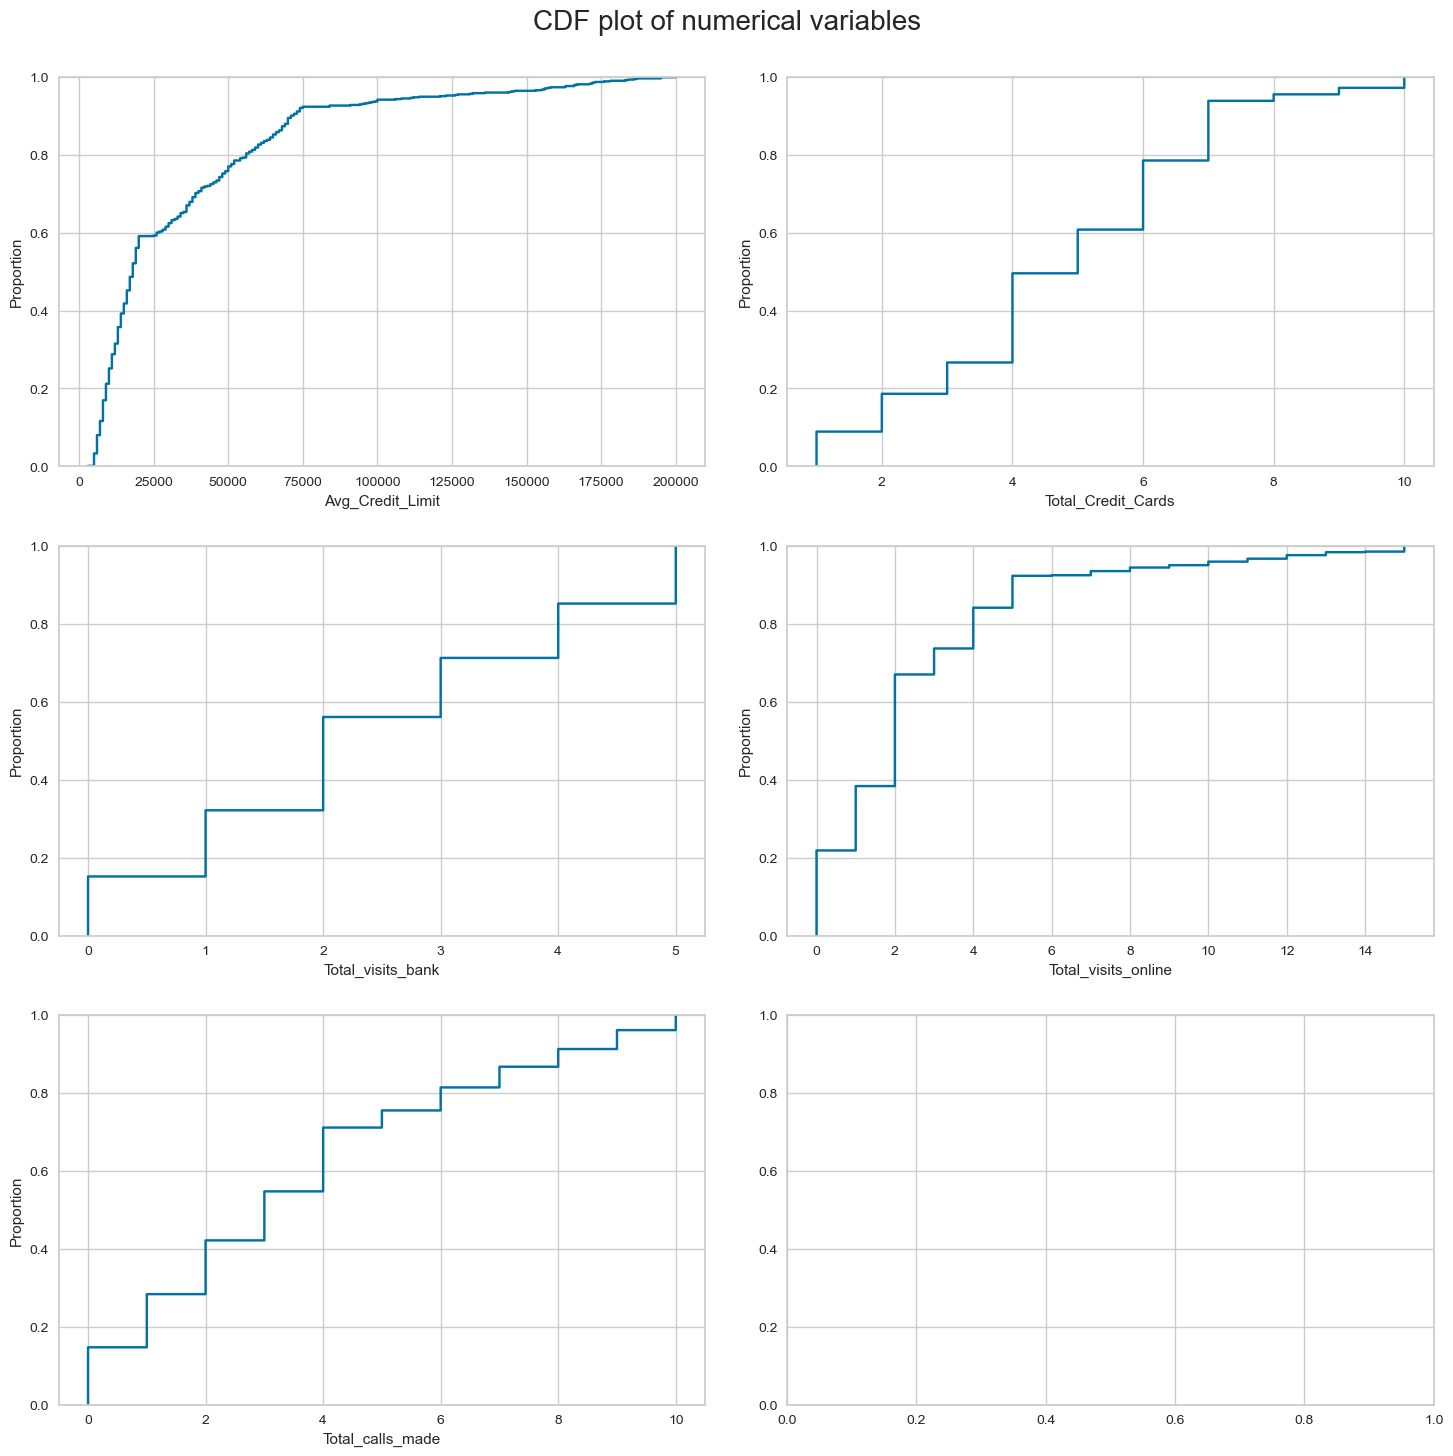

In [19]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
fig.suptitle("CDF plot of numerical variables", fontsize=20)

counter = 0

for ii in range(3):
    sns.ecdfplot(data=data, ax=axes[ii][0], x=data.columns.tolist()[counter])
    counter = counter + 1
    if counter != 5:
        sns.ecdfplot(data=data, ax=axes[ii][1], x=data.columns.tolist()[counter])
        counter = counter + 1
    else:
        pass

fig.tight_layout(pad=2.0)

**Observations**

- 90% of customers have Average credit card limit less than 75000
- 95% of custmers have Total_Credit_Cards less than 8
- 50% of customers have not made more than 2 visits to the bank annually
- ~ 90% of customers have not made more than 5 visits online to the bank annually
- 80% of customers have not made more than 6 calls to the bank annually


### Bivariate Analysis

**Let's check for correlations.**

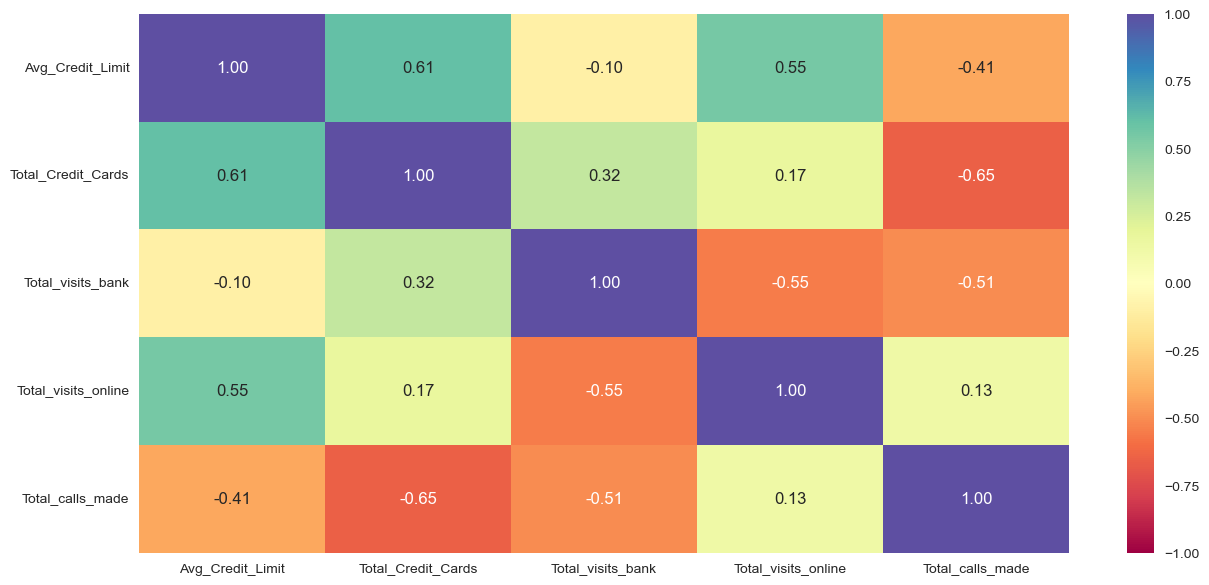

In [20]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

**Observations**

- Average credit card limit per customer is highly positively correlated with total credit limit and total visits online by customers annually, and moderately negatively correlated with total calls made by the customers to the bank annually.
- Total credit cards is highly negatively correlated with total calls made to the bank annually
- The total visits made to the bank by customers annually is negatively correlated with total visits online and total calls madet o the bank annually


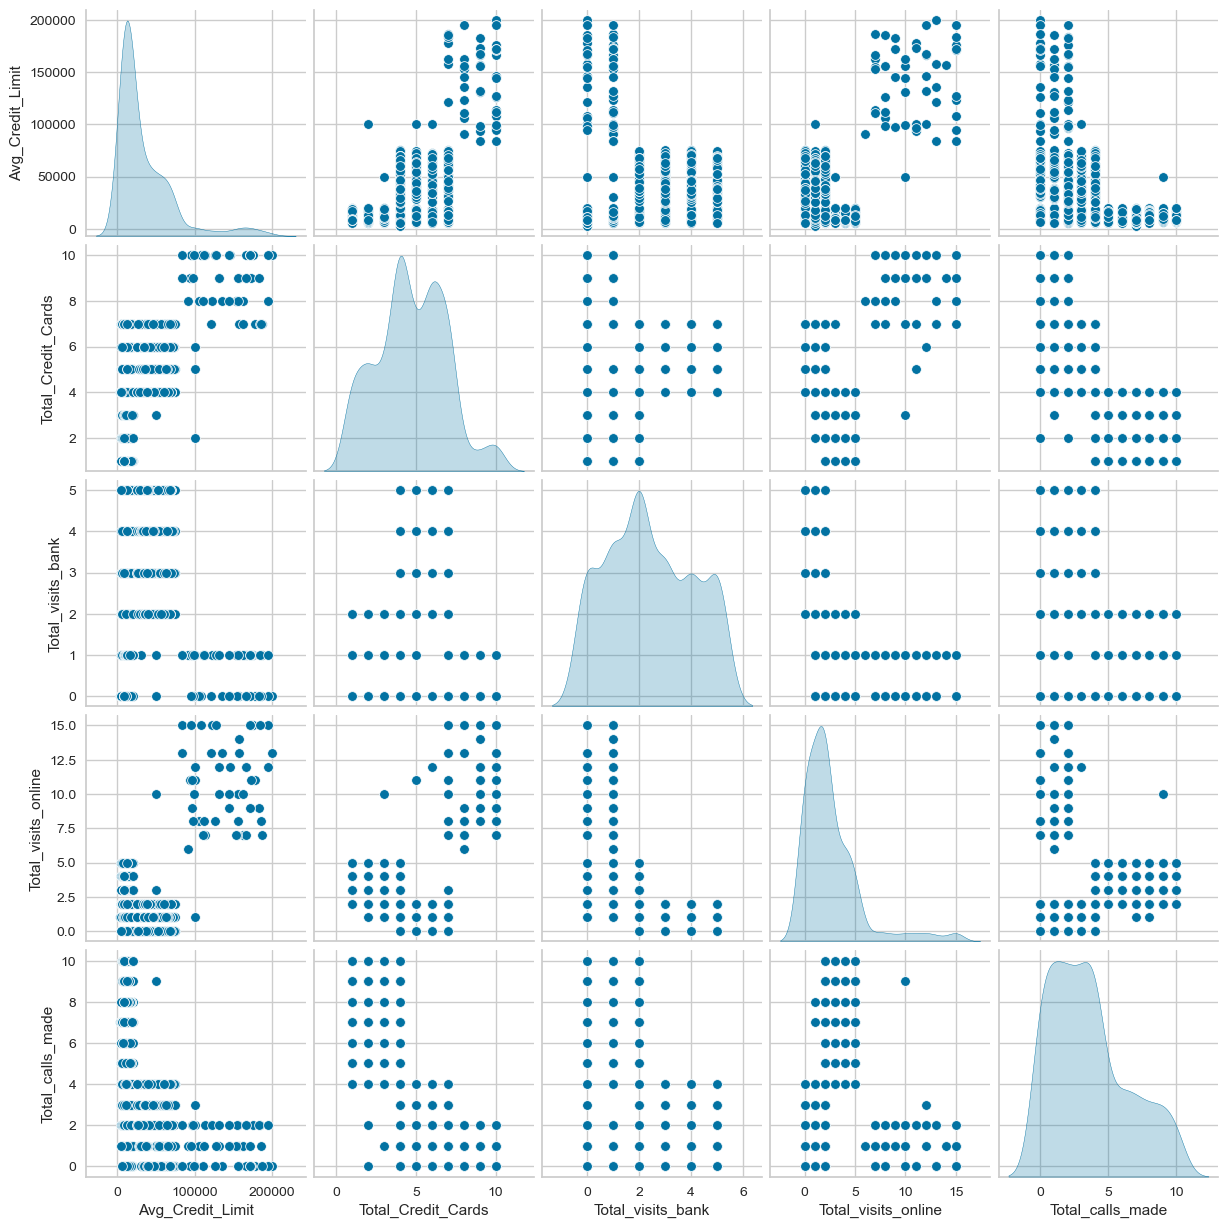

In [21]:
sns.pairplot(data=data, diag_kind="kde")
plt.show()

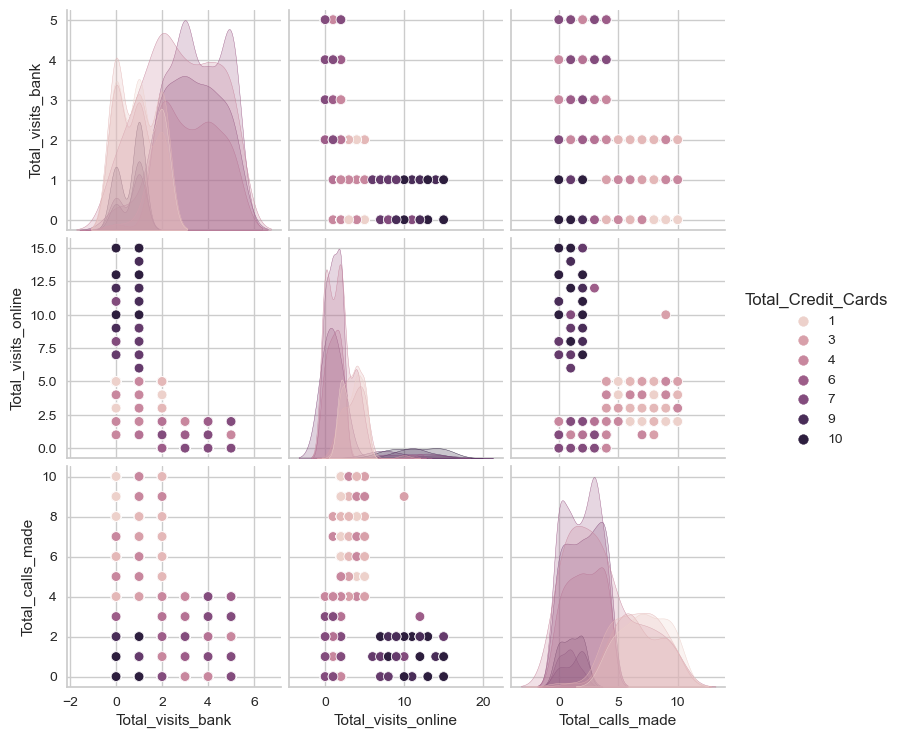

In [22]:
sns.pairplot(
    data=data[
        [
            "Total_visits_bank",
            "Total_visits_online",
            "Total_calls_made",
            "Total_Credit_Cards",
        ]
    ],
    hue="Total_Credit_Cards",
)

plt.show()

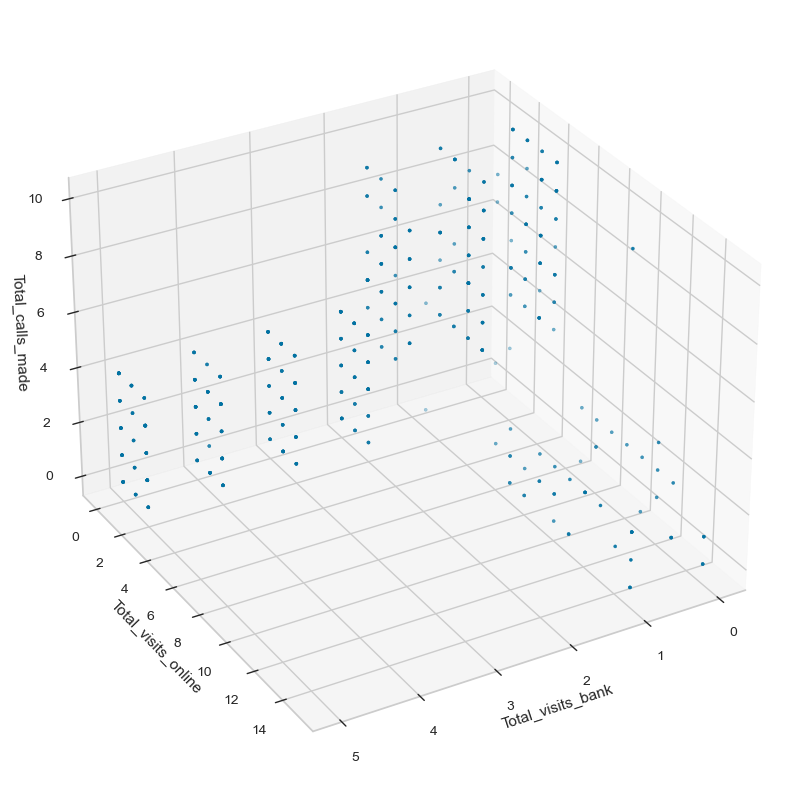

In [23]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection="3d")

x = data["Total_visits_bank"]
y = data["Total_visits_online"]
z = data["Total_calls_made"]


ax.scatter(x, y, z, marker=".")
ax.set_xlabel("Total_visits_bank")
ax.set_ylabel("Total_visits_online")
ax.set_zlabel("Total_calls_made")
ax.view_init(azim=60)
plt.show()

**Observations**

- Again, it can be seen that the total visits made to the bank annually increases as the total online visit and total calls made to the bank annually decreases.

## Data Preprocessing

### Outlier Detection

- Find outliers in the data using z-score with a threshold of 3.

In [24]:
import numpy as np

threshold = 3  # Set the threshold value

outlier = {}
for col in data.columns:
    i = data[col]
    mean = np.mean(data[col])
    std = np.std(data[col])
    list1 = []
    for v in i:
        z = (v - mean) / std
        if z > threshold:
            list1.append(v)
    list1.sort()
    outlier[i.name] = list1

print("The following are the outliers in the data:")
for key, value in outlier.items():
    print("\n", key, ":", value)


The following are the outliers in the data:

 Avg_Credit_Limit : [153000, 155000, 156000, 156000, 157000, 158000, 163000, 163000, 166000, 166000, 167000, 171000, 172000, 172000, 173000, 176000, 178000, 183000, 184000, 186000, 187000, 195000, 195000, 200000]

 Total_Credit_Cards : []

 Total_visits_bank : []

 Total_visits_online : [12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15]

 Total_calls_made : []


**Observations**

- The  Avg_Credit_Limit column has 24 outliers on the upper bounds of the data
- The Total_Credit_Cards, Total_visits_bank and  Total_calls_made columns have no outliers
- The Total_visits_online column has 22 outliers on the upper bounds of the data

### Scaling

- StandardScaler standardizes a feature by subtracting the mean and then scaling to unit variance. Unit variance means dividing all the values by the standard deviation.

1. Data standardization is the process of rescaling the attributes so that they have a mean of 0 and a variance of 1.
2. The ultimate goal to perform standardization is to bring down all the features to a common scale without distorting the differences in the range of the values.
3. In sklearn.preprocessing.StandardScaler(), centering and scaling happen independently on each feature.

In [28]:
# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the data and transform it
scaled_data = scaler.fit_transform(data)

# Create a new DataFrame with the scaled data
scaled_df = pd.DataFrame(scaled_data, columns=data.columns)

# Print the scaled DataFrame
scaled_df.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,0.410293,1.058973,-0.860451,0.134290,0.145528
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,1.740187,0.597334,-1.473731,3.202298,-0.203739


- The data has now been scaled using StandardScaler

## K-means Clustering

### Checking Elbow Plot

In [29]:
k_means_df = scaled_df.copy()

Number of Clusters: 2 	Average Distortion: 2040.9898164784947
Number of Clusters: 3 	Average Distortion: 933.0437490000531
Number of Clusters: 4 	Average Distortion: 780.773689555177
Number of Clusters: 5 	Average Distortion: 704.4759188657513
Number of Clusters: 6 	Average Distortion: 642.4285451423211
Number of Clusters: 7 	Average Distortion: 600.2238778375963
Number of Clusters: 8 	Average Distortion: 574.4418958177622
Number of Clusters: 9 	Average Distortion: 538.8269188945013
Number of Clusters: 10 	Average Distortion: 509.16313788912544


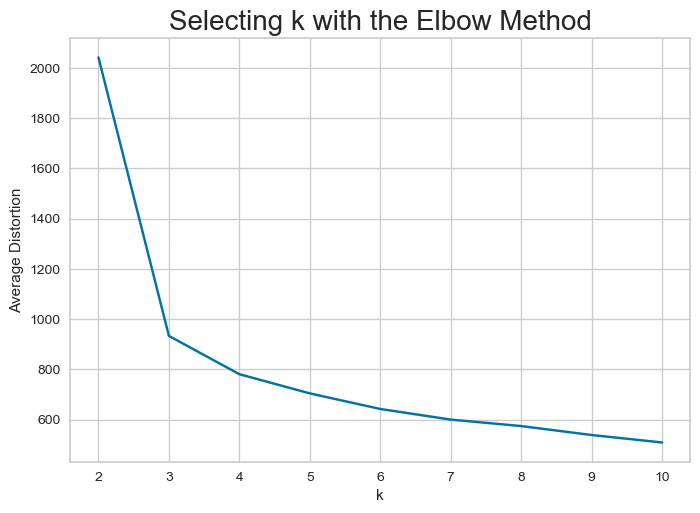

In [31]:
clusters = range(2, 11)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k, random_state=1)
    model.fit(scaled_df)
    prediction = model.predict(k_means_df)
    distortion = sum(
        np.min(cdist(k_means_df, model.cluster_centers_, "euclidean"), axis=1) ** 2)

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)
plt.show()

- Appropriate value of k seems to be 3

In [ ]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2, 10), timings=True)
visualizer.fit(k_means_df)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

### Let's check the silhouette scores

For n_clusters = 2, the silhouette score is 0.41842496663215445)
For n_clusters = 3, the silhouette score is 0.5157182558881063)
For n_clusters = 4, the silhouette score is 0.3556670619372605)
For n_clusters = 5, the silhouette score is 0.2717470361089752)
For n_clusters = 6, the silhouette score is 0.255906765297388)
For n_clusters = 7, the silhouette score is 0.24798644656011146)
For n_clusters = 8, the silhouette score is 0.2414240144760896)
For n_clusters = 9, the silhouette score is 0.2184645050755029)


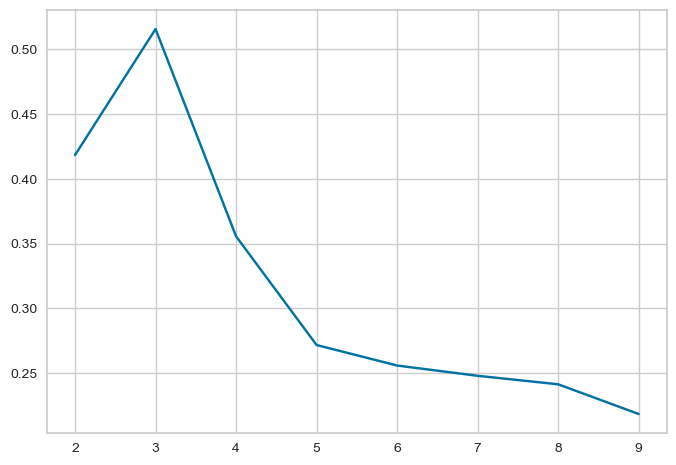

In [34]:
sil_score = []
cluster_list = range(2, 10)
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    preds = clusterer.fit_predict((scaled_df))
    score = silhouette_score(k_means_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))
    
plt.plot(cluster_list, sil_score)
plt.show()

- Silhoutte score for n_number of clusters of 3 yields the highest value so the ideal number of cluster to use is 3

**Let's visualize the silhouette scores for different number of clusters**

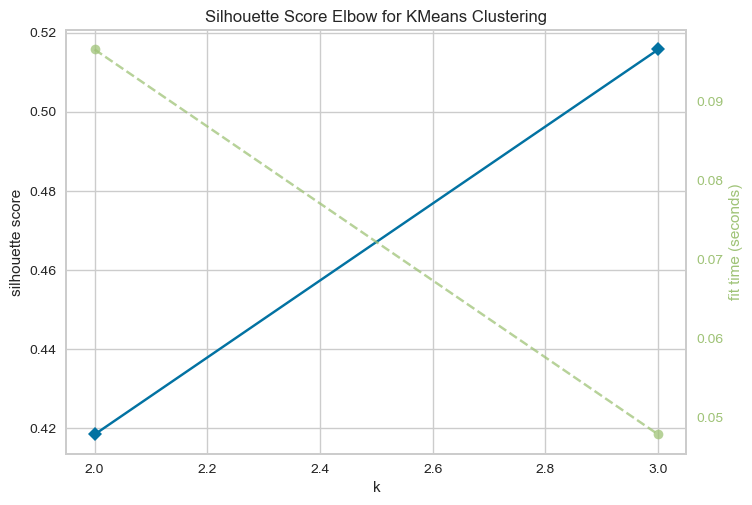

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [35]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2, 4), metric="silhouette", timings=True)
visualizer.fit(k_means_df)  # fit the data to the visualizer
visualizer.show()


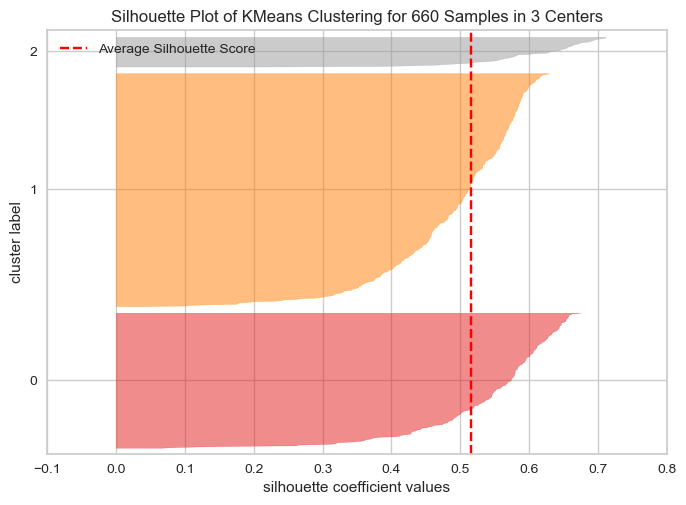

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 660 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [36]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(3, random_state=1))  ## Complete the code to visualize the silhouette scores for certain number of clusters
visualizer.fit(k_means_df)
visualizer.show()

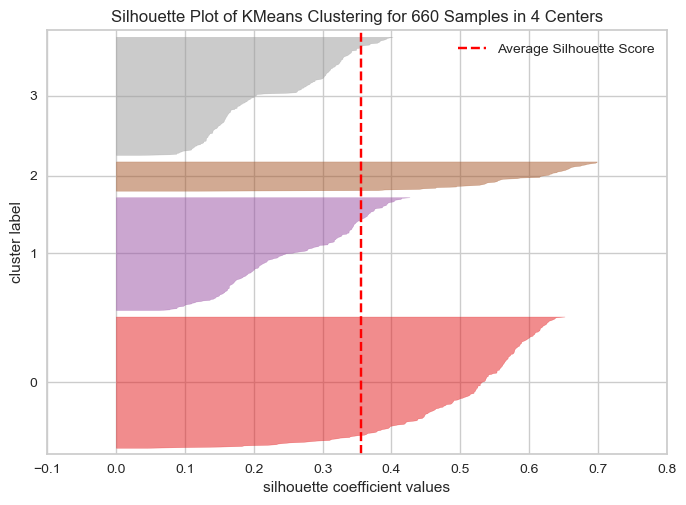

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 660 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [37]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))  ## Complete the code to visualize the silhouette scores for certain number of clusters
visualizer.fit(k_means_df)
visualizer.show()

### Creating Final Model

- Since 3 is the ideal number of clusters. Choosing 3 as KMeans.

In [41]:
%%time
kmeans = KMeans(n_clusters=3, random_state=1) 
kmeans.fit(scaled_df)

Wall time: 43.9 ms


KMeans(n_clusters=3, random_state=1)

In [141]:
df1 = data.copy()


# adding kmeans cluster labels to the original and scaled dataframes
k_means_df["K_means_segments"] = kmeans.labels_
df1["K_means_segments"] = kmeans.labels_

## Hierarchical Clustering

### Computing Cophenetic Correlation

In [142]:
hc_df = scaled_df.copy()

In [143]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(scaled_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(scaled_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.8570957708532765.
Cophenetic correlation for Euclidean distance and complete linkage is 0.9200216505568093.
Cophenetic correlation for Euclidean distance and average linkage is 0.9326509851302.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.9161162029575868.
Cophenetic correlation for Chebyshev distance and single linkage is 0.7303102980726248.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.8605582722891504.
Cophenetic correlation for Chebyshev distance and average linkage is 0.9237370020598301.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.9176649995194868.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.9059233776187978.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.7299246156228577.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.8094940365376216.
Cophenetic corre

In [144]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9326509851302, which is obtained with Euclidean distance and average linkage.


**Let's explore different linkage methods with Euclidean distance only.**

In [145]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(scaled_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(scaled_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.8570957708532765.
Cophenetic correlation for complete linkage is 0.9200216505568093.
Cophenetic correlation for average linkage is 0.9326509851302.
Cophenetic correlation for centroid linkage is 0.9288470643805258.
Cophenetic correlation for ward linkage is 0.8237257149884929.
Cophenetic correlation for weighted linkage is 0.9161162029575868.


In [146]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print()
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)


Highest cophenetic correlation is 0.9326509851302, which is obtained with average linkage.


### Checking Dendrograms

**We see that the cophenetic correlation is maximum with Euclidean distance and average linkage.**


**Let's view the dendrograms for the different linkage methods.**

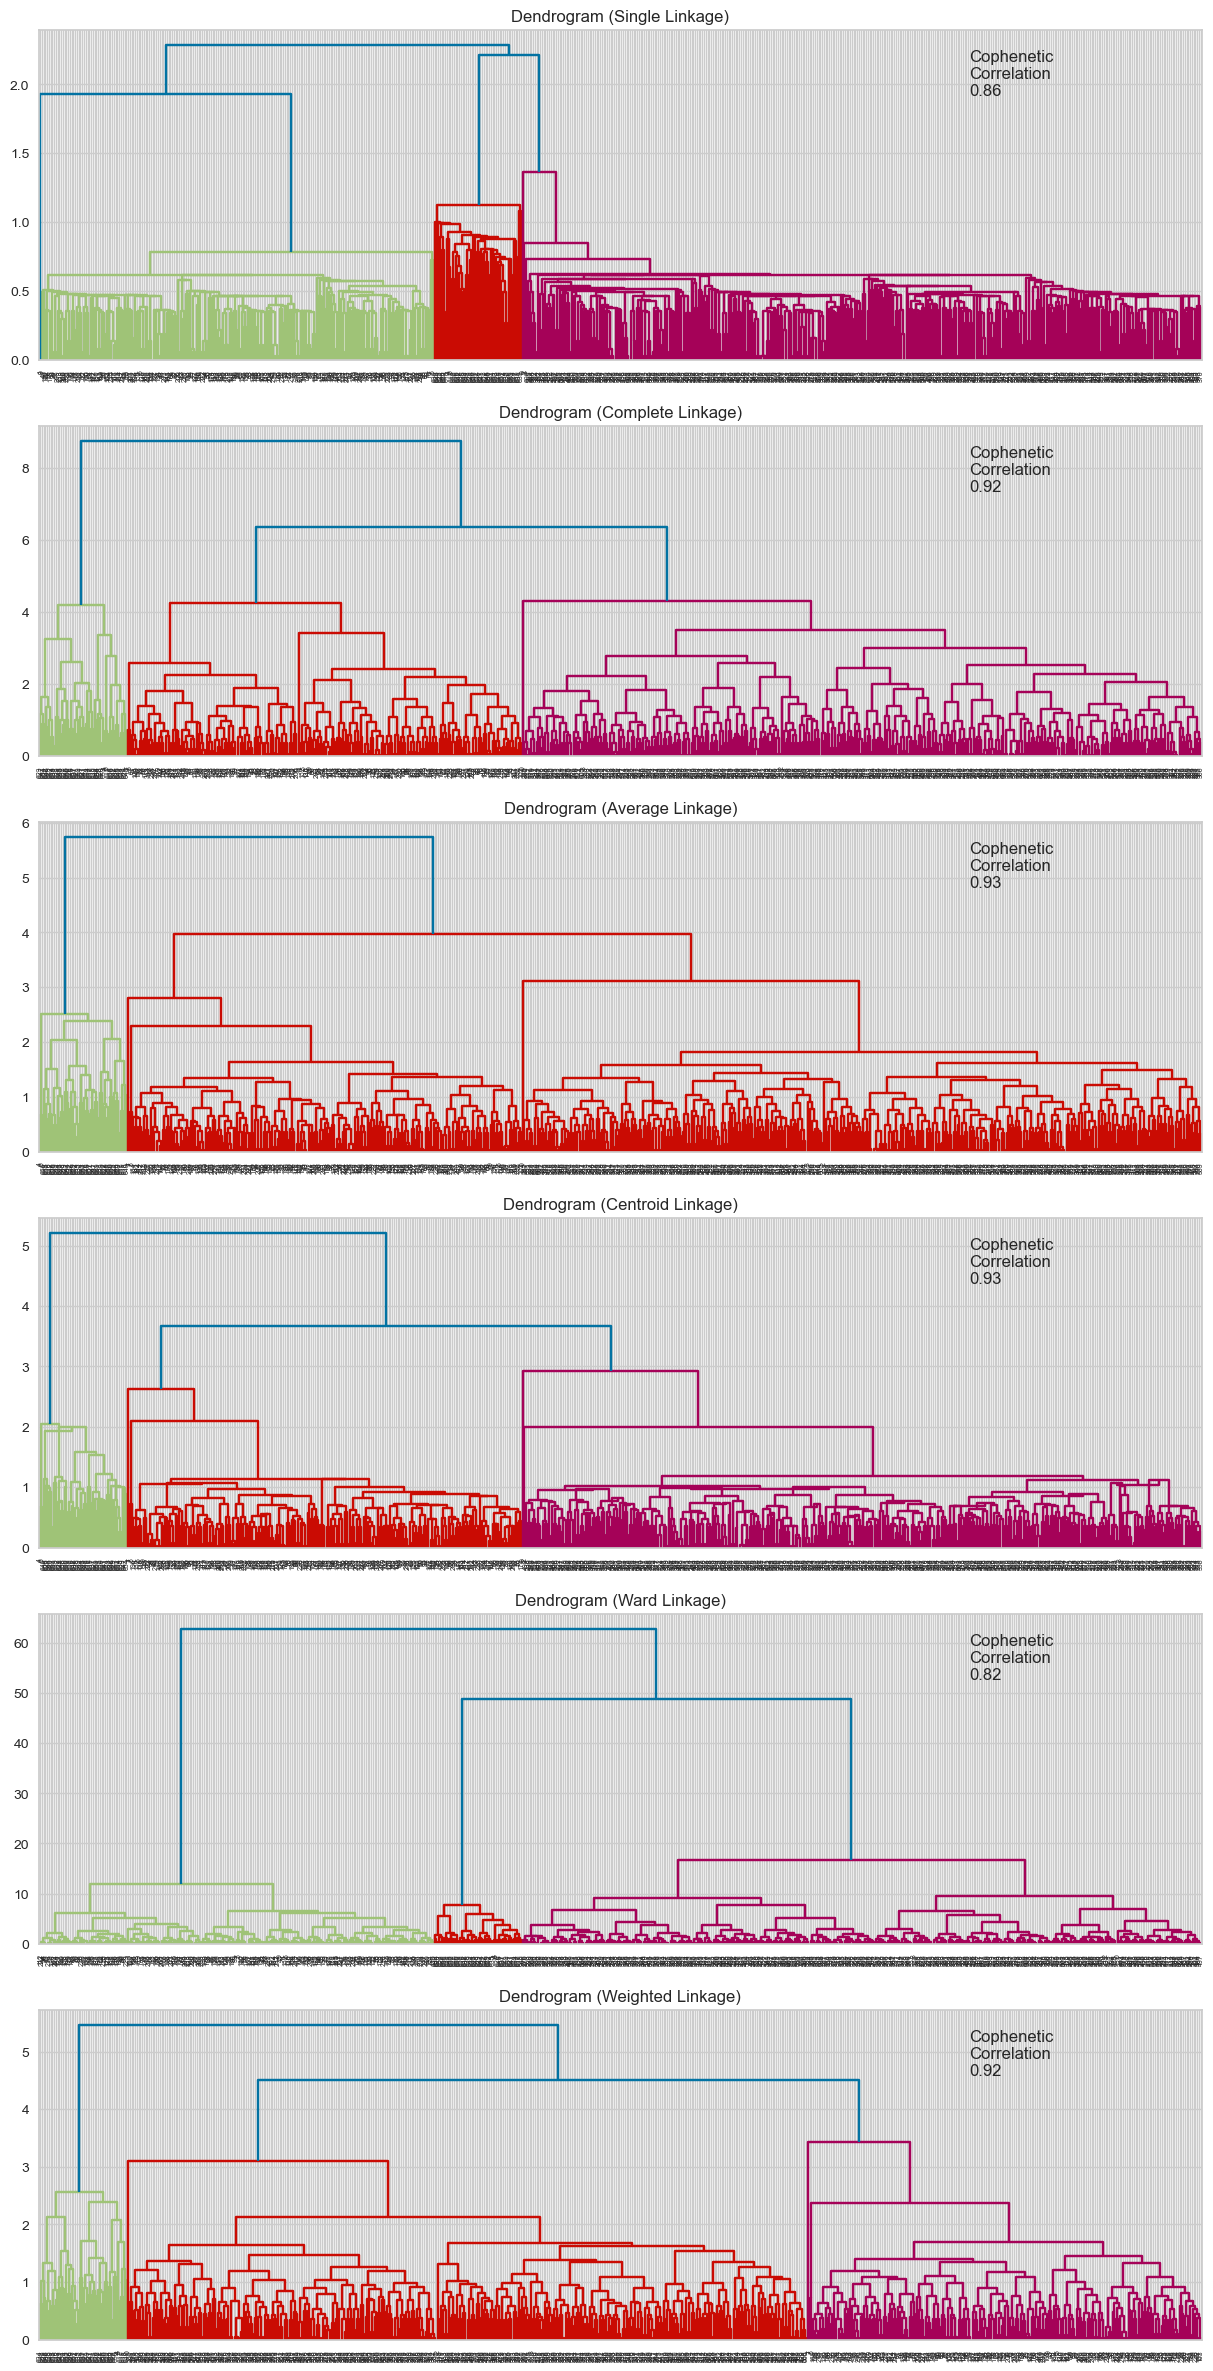

In [147]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(scaled_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(scaled_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

**Observations**

- The cophenetic correlation is highest for average, centroid and weighted linkage methods.
- We will move ahead with Average linkage.

**Dendrogram with average linkage shows distinct and separate cluster tree.**

In [173]:
# Assuming you have the necessary values for compare and compare_cols
compare = [0.75]  # List of values for comparison
compare_cols = ["Cophenetic Coefficient"]  # List of column names

# Create the DataFrame to compare cophenetic correlations
df_cc = pd.DataFrame(compare, columns=compare_cols)

# Sort the DataFrame by the specified column
df_cc = df_cc.sort_values(by="Cophenetic Coefficient")

# Print the resulting DataFrame
print(df_cc)

   Cophenetic Coefficient
0                    0.75


### Creating Final Model

In [162]:
%%time
HCmodel = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="average")

HCmodel.fit(hc_df)

Wall time: 18 ms


AgglomerativeClustering(linkage='average', n_clusters=3)

In [150]:
df2 = data.copy()

# adding hierarchical cluster labels to the original and scaled dataframes
hc_df["HC_segments"] = HCmodel.labels_
df2["HC_segments"] = HCmodel.labels_

In [151]:
hc_df.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,K_means_segments,HC_Clusters,HC_segments
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537,1,0,0
1,0.410293,-0.787585,-1.473731,2.520519,1.891859,0,2,2
2,0.410293,1.058973,-0.860451,0.134290,0.145528,1,0,0
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528,1,0,0
4,1.740187,0.597334,-1.473731,3.202298,-0.203739,2,1,1


In [152]:
df2.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,K_means_segments,HC_Clusters,HC_segments
0,100000,2,1,1,0,1,0,0
1,50000,3,0,10,9,0,2,2
2,50000,7,1,3,4,1,0,0
3,30000,5,1,1,4,1,0,0
4,100000,6,0,12,3,2,1,1


In [153]:
scaled_df["HC_Clusters"] = HCmodel.labels_
data["HC_Clusters"] = HCmodel.labels_

## Cluster Profiling and Comparison

### Cluster Profiling: K-means Clustering

In [154]:
km_cluster_profile = data.groupby("HC_Clusters").mean()

In [155]:
km_cluster_profile["count_in_each_segments"] = (
    data.groupby("HC_Clusters")["Avg_Credit_Limit"].count().values
)

In [156]:
km_cluster_profile

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,K_means_segments,count_in_each_segments
HC_Clusters,,,,,,,
0,33782.383420,5.515544,3.489637,0.981865,2.000000,1.0,386
1,141040.000000,8.740000,0.600000,10.900000,1.080000,2.0,50
2,12174.107143,2.410714,0.933036,3.553571,6.870536,0.0,224


### Cluster Profiling: Hierarchical Clustering

In [157]:
hc_cluster_profile = df2.groupby("HC_segments").mean()

In [160]:
hc_cluster_profile["count_in_each_segment"] = (
    df2.groupby("HC_segments")["Avg_Credit_Limit"].count().values
)

In [161]:
hc_cluster_profile

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,K_means_segments,HC_Clusters,count_in_each_segment
HC_segments,,,,,,,,
0,33782.383420,5.515544,3.489637,0.981865,2.000000,1.0,0.0,386
1,141040.000000,8.740000,0.600000,10.900000,1.080000,2.0,1.0,50
2,12174.107143,2.410714,0.933036,3.553571,6.870536,0.0,2.0,224


## K-means vs Hierarchical Clustering

You compare several things, like:
- Hierarchical Clustering executed faster than K-means
- Both techniues produced the same clusters?
- For both techniques, there are 386 observation in cluster 0, 50 observations in cluster 1 and 224 observations in cluster 2


In [163]:
km_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,K_means_segments,count_in_each_segments
HC_Clusters,,,,,,,
0,33782.383420,5.515544,3.489637,0.981865,2.000000,1.000000,386
1,141040.000000,8.740000,0.600000,10.900000,1.080000,2.000000,50
2,12174.107143,2.410714,0.933036,3.553571,6.870536,0.000000,224


In [164]:
hc_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,K_means_segments,HC_Clusters,count_in_each_segment
HC_segments,,,,,,,,
0,33782.383420,5.515544,3.489637,0.981865,2.000000,1.000000,0.000000,386
1,141040.000000,8.740000,0.600000,10.900000,1.080000,2.000000,1.000000,50
2,12174.107143,2.410714,0.933036,3.553571,6.870536,0.000000,2.000000,224


<AxesSubplot:xlabel='HC_Clusters'>

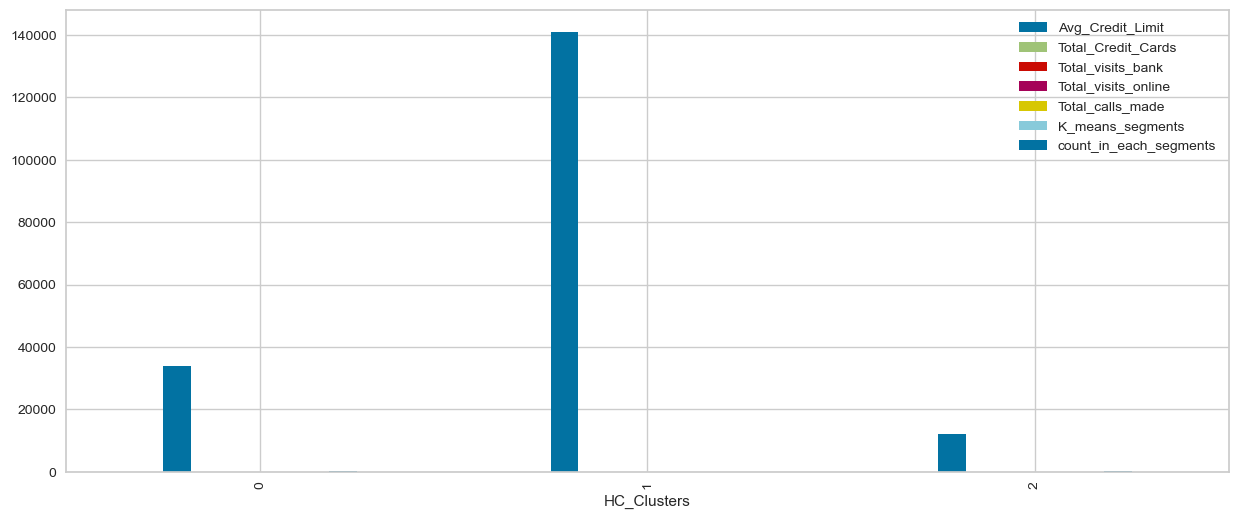

In [165]:
km_cluster_profile.groupby("HC_Clusters").mean().plot.bar(figsize=(15, 6))

<AxesSubplot:xlabel='HC_segments'>

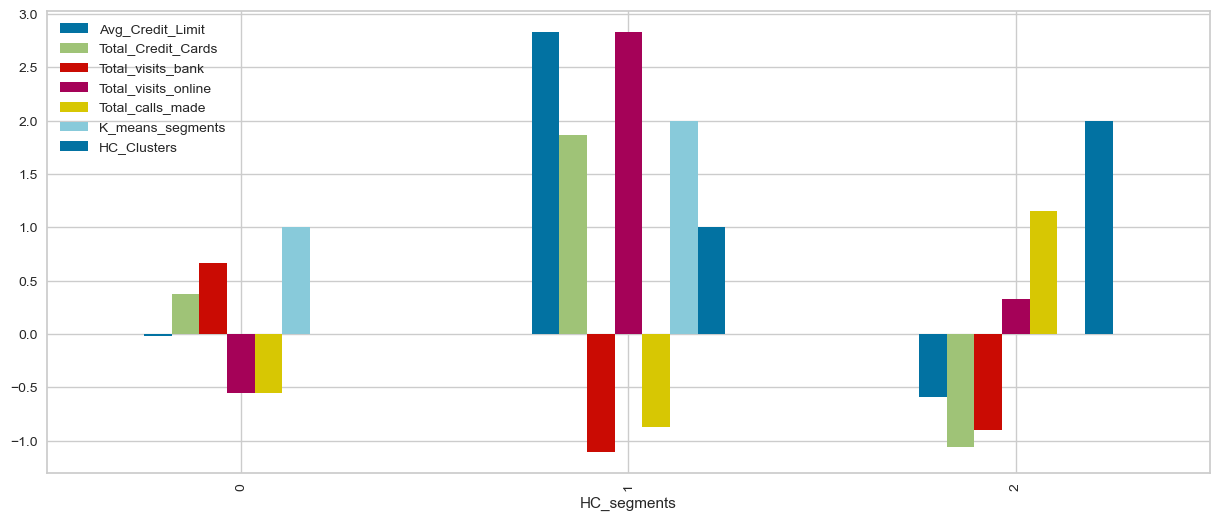

In [166]:
hc_df.groupby("HC_segments").mean().plot.bar(figsize=(15, 6))

In [167]:
k_means_df.loc[k_means_df["K_means_segments"] == 1, "K_means_segments"] = 3
k_means_df.loc[k_means_df["K_means_segments"] == 2, "K_means_segments"] = 1
k_means_df.loc[k_means_df["K_means_segments"] == 3, "K_means_segments"] = 2
df1["K_means_segments"] = k_means_df["K_means_segments"]

km_cluster_profile = df1.groupby("K_means_segments").mean()
km_cluster_profile["count_in_each_segment"] = (
    df1.groupby("K_means_segments")["Avg_Credit_Limit"].count().values
)

In [168]:
km_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,HC_Clusters,count_in_each_segment
K_means_segments,,,,,,,
0,12174.107143,2.410714,0.933036,3.553571,6.870536,2.000000,224
1,141040.000000,8.740000,0.600000,10.900000,1.080000,1.000000,50
2,33782.383420,5.515544,3.489637,0.981865,2.000000,0.000000,386


<AxesSubplot:xlabel='K_means_segments'>

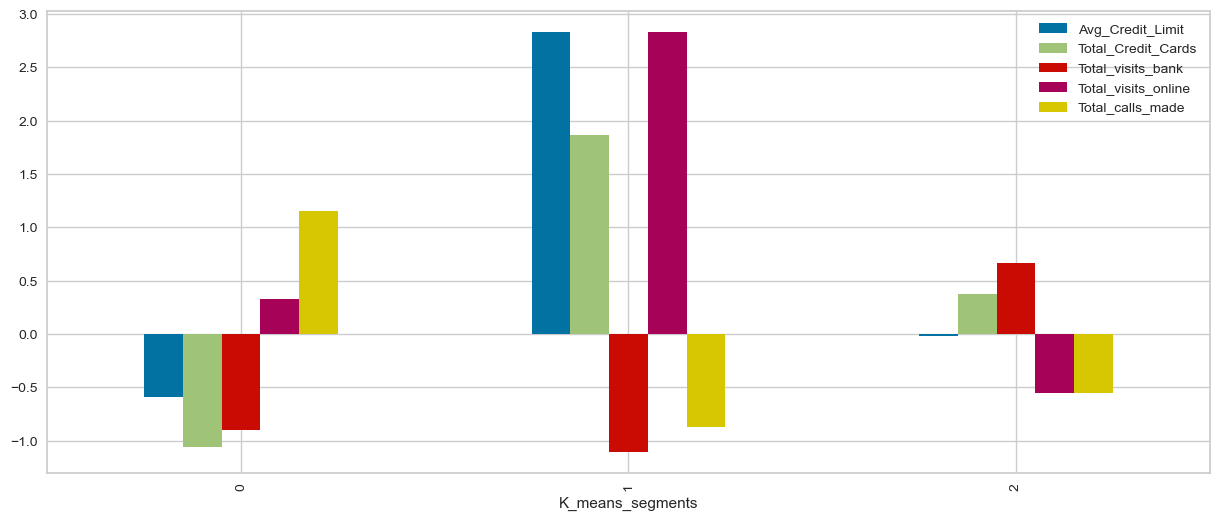

In [169]:
k_means_df.groupby("K_means_segments").mean().plot.bar(figsize=(15, 6))

**Let's create some plots on the original data to understand the customer distribution among the clusters.**

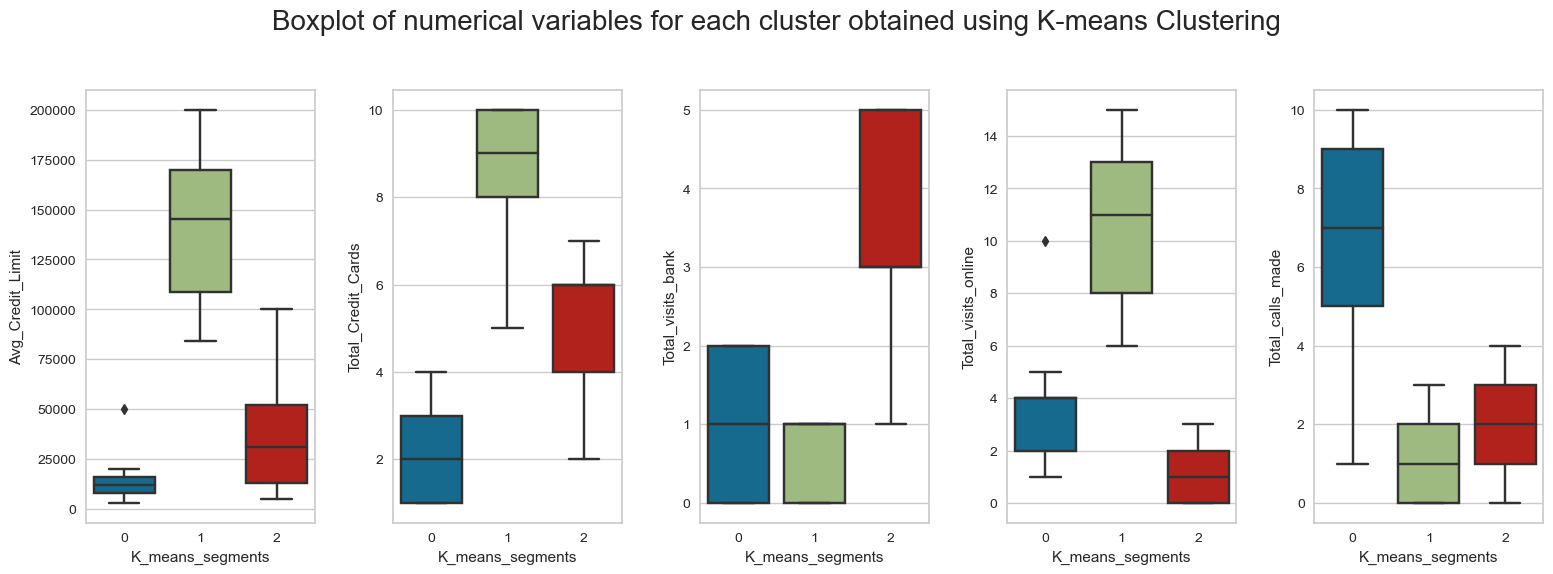

In [170]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle(
    "Boxplot of numerical variables for each cluster obtained using K-means Clustering",
    fontsize=20,
)

counter = 0

for ii in range(5):
    sns.boxplot(
        ax=axes[ii], y=df1[df1.columns[counter]], x=k_means_df["K_means_segments"]
    )
    counter = counter + 1

fig.tight_layout(pad=2.0)

### Insights

**Cluster 0**
- There are 386 observations in this cluster
- Average credit card limit for customers in this category is ~ 12,500
- The average number of credit cards owned by customers in this category is 2
- Total visits to the bank made by customers annually has an average of 1, with higher total online visits made annually.
- Customers in this cluster made an average of 7 calls annually to the bank

**Cluster 1**

- There are 50 observations in this cluster
- Average credit card limit for customers in this category is ~ 138,000
- The average number of credit cards owned by customers in this category is 9
- Total visits to the bank made by customers annually is highest for this category, with average total online visits made annually = 11
- Customers in this cluster made an average of 1 calls annually to the bank

**Cluster 2**

- There are 224 observations in this cluster
- Average credit card limit for customers in this category is ~ 37,500
- The average number of credit cards owned by customers in this category is ~5
- Total visits to the bank made by customers annually is lowest for this category, with average total online visits made annually = 1
- Customers in this cluster made an average of 2 calls annually to the bank


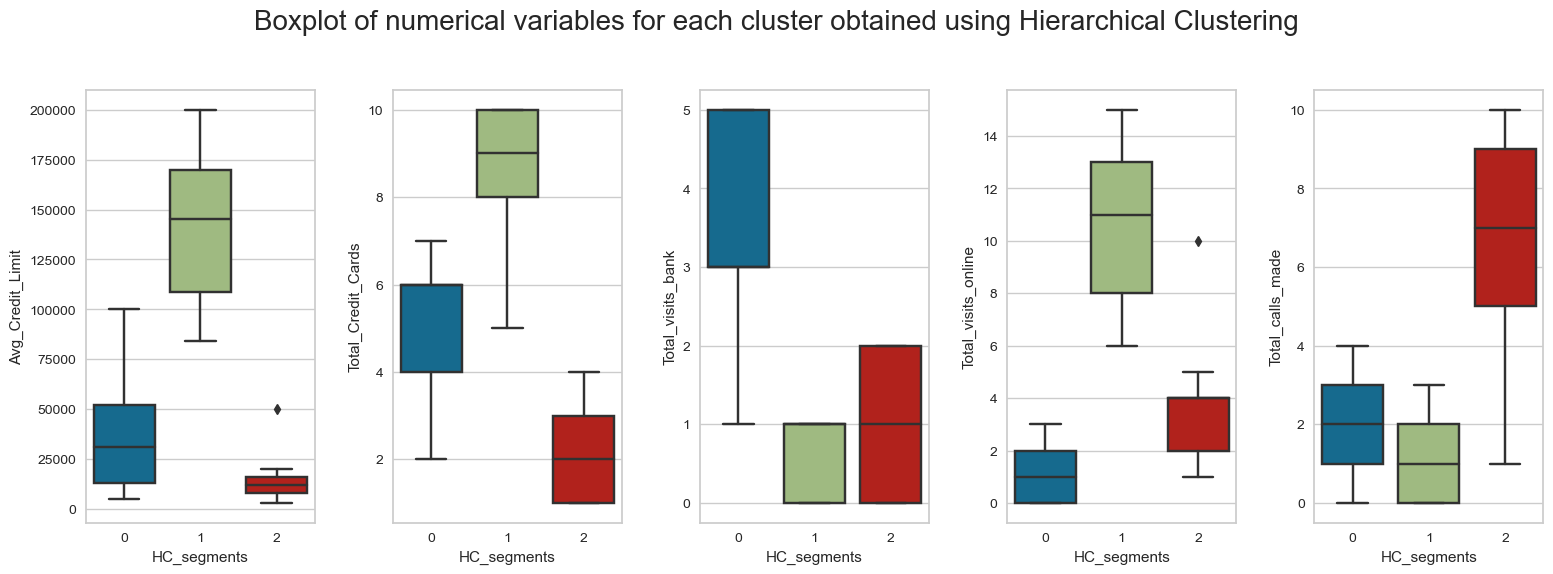

In [171]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle(
    "Boxplot of numerical variables for each cluster obtained using Hierarchical Clustering",
    fontsize=20,
)

counter = 0

for ii in range(5):
    sns.boxplot(ax=axes[ii], y=df2[df2.columns[counter]], x=hc_df["HC_segments"])
    counter = counter + 1

fig.tight_layout(pad=2.0)

### Insights

**Cluster 0**
- There are 386 observations in this cluster
- Average credit card limit for customers in this category is ~ 37500
- The average number of credit cards owned by customers in this category is ~5 
- Total visits to the bank made by customers annually is highest for this category, with lowest total online visits made annually average of 1
- Customers in this cluster made an average of 2 calls annually to the bank

**Cluster 1**

- There are 50 observations in this cluster
- Average credit card limit for customers in this category is ~ 138,000
- The average number of credit cards owned by customers in this category is 9
- Total visits to the bank made by customers annually is highest for this category, with average total online visits made annually = 11
- Customers in this cluster made an average of 1 calls annually to the bank

**Cluster 2**

- There are 224 observations in this cluster
- Average credit card limit for customers in this category is ~ 37,500
- The average number of credit cards owned by customers in this category is ~5
- Average total visits to the bank made by customers annually is lowest for this category, with average total online visits made annually = 11 i.e. Highest for all of the categories.
- Customers in this cluster made an average of 7 calls annually to the bank


## Actionable Insights and Recommendations

- Based on the profiling done above, it is recommended that cluster focus should be placed on customers in cluster 1 category.


___